In [1]:
# Importing Dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import datetime as dt

In [2]:
#Reflect Tables into SQLAlchemy ORM
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
# Create engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
# Getting Columns Name

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


,prcp
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


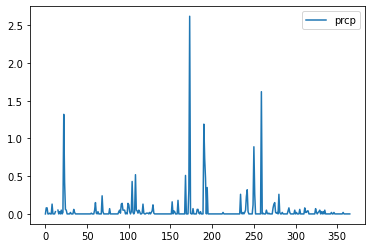

In [14]:
#1 Design a query to retrieve the last 12 months of precipitation data and plot the results jooop
engine.execute("select * from Measurement limit 10").fetchall()
session.query(func.count(Measurement.date)).all()

#2 Calculate the date 1 year ago from today.Design a query to retrieve the last 12 months of precipitation data.

current_year=session.query(func.max(Measurement.date)).all()
current_year

#3 Select only the `date` and `prcp` values. Load the query results into a Pandas DataFrame and set the index to the date column.

val_cal = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
        filter(Measurement.date <= "2017-08-23").\
        group_by(Measurement.date).all()
val_cal


 #4 Sort the DataFrame values by `date`
df = pd.DataFrame(val_cal, columns=['date','prcp'])

df.sort_values(by='date',ascending= True) 
df.rename(columns={0:"Date",1:"Precipitation"},inplace =True)
df.set_index('date')
df.head

# 5 Plot the Results in a Matplotlib bar chart
df.plot()
plt.figure(1)

#6 Use Pandas to print the summary statistics for the precipitation data.
df.describe()

In [15]:
#Station Analysis
# 1. Design a query to calculate the total number of stations.

total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9,)]